In [31]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import simps
import scipy.fft

# Serie de Fourier

In [32]:
# Parámetros
periodoL = 10 # Periodicity of the periodic function f(x)
freq = 10 # No of waves in time period L
dutycycle = 0.5
width_range = 1
nMuestras = 10000
nTerminos = 1500


# Puntos t
arreglo_X = np.linspace(0, periodoL, nMuestras, endpoint=False)

# Señales y(t)
#arreglo_Y = signal.sawtooth(2.0*np.pi*arreglo_X*freq/periodoL ,width=width_range)
arreglo_Y = signal.square(2.0*np.pi*arreglo_X*freq/periodoL , duty=dutycycle)
#arreglo_Y = signal.gausspulse(2.0*np.pi*arreglo_X*freq/periodoL, fc=0.05)

In [33]:
def CálculoCoeficientes(X,Y,iN):
    """
    iN: entero, n-ésimo término de la serie
    X, Y: arreglos unidimensionales con las coordenadas de la señal a aproximar

    Pseudocódigo:
    1. Inicialice dos arreglos donde se almacenarán los coeficientes a_n y b_n para cada coodenada x
    2. Calcule los valores de los coeficientes a_n y b_n para cada coordenada x
    3. Retorne los arreglos con los coeficientes a_n y b_n
    """
    a_n = 2*np.trapz(Y*np.cos(iN*(2*np.pi/periodoL)*X),X)/periodoL
    b_n = 2*np.trapz(Y*np.sin(iN*(2*np.pi/periodoL)*X),X)/periodoL
    
    return a_n,b_n

In [34]:
def AnálisisdeFourier(X,Y,N):
    """
    X, Y: arreglos unidimensionales con las coordenadas de la señal a aproximar
    N: entero que indica el número de términos a sumar en la serie de Fourier

    Pseudocódigo:
    1. Calcule el coeficiente a_0.
    2. Inicialice un arreglo lleno de ceros llamado suma_Fourier. En este arreglo se almacenarán
       los valores de la serie de Fourier para cada coordenada x.
    3. Inicialice un ciclo que se recorrerá tantas veces como términos se quieren usar
       para la aproximación.
    3.1. Calcule los coeficientes a_n y b_n para el n-ésimo término de la serie usando
         la función Cálculo_Coeficientes()
    3.2. Calcule el valor de la suma de Fourier para cada valor de x
    3.3. Sume el valor obtenido en el paso 3.3 al arreglo suma_Fourier

    4. Sume a_0/2 a cada entrada de suma_Fourier
    5. Retorne el arreglo suma_Fourier
    """
    a_0 = 2*np.trapz(Y,X)/periodoL
    suma_fourier = np.zeros(len(X))
    for iN in range(1,N+1):
        a_n,b_n = CálculoCoeficientes(X,Y,iN)
        suma_fourier = suma_fourier + a_n*np.cos(2*np.pi*iN*X/periodoL) + b_n*np.sin(2*np.pi*iN*X/periodoL)
        derivada_fourier = 2*np.pi*b_n*iN*np.sin(2*np.pi*iN*X/periodoL)/periodoL-2*np.pi*a_n*iN*np.cos(2*np.pi*iN*X/periodoL)/periodoL
    return suma_fourier + a_0/2,derivada_fourier

In [35]:
señal_aprox,derivada = AnálisisdeFourier(arreglo_X, arreglo_Y, nTerminos)

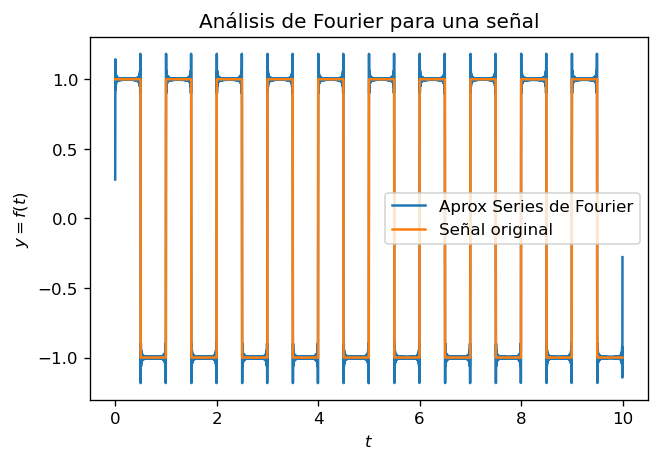

In [36]:
# Gráfico
fig, ax = plt.subplots(dpi=120)
ax.plot(arreglo_X, señal_aprox, label='Aprox Series de Fourier')
#ax.plot(arreglo_X, derivada, label='derivada')
ax.plot(arreglo_X, arreglo_Y, label='Señal original')
ax.set_xlabel('$t$')
ax.set_ylabel('$y=f(t)$')
plt.legend(loc='best', prop={'size':10})
plt.title('Análisis de Fourier para una señal')
plt.show()

# Transformada de Fourier

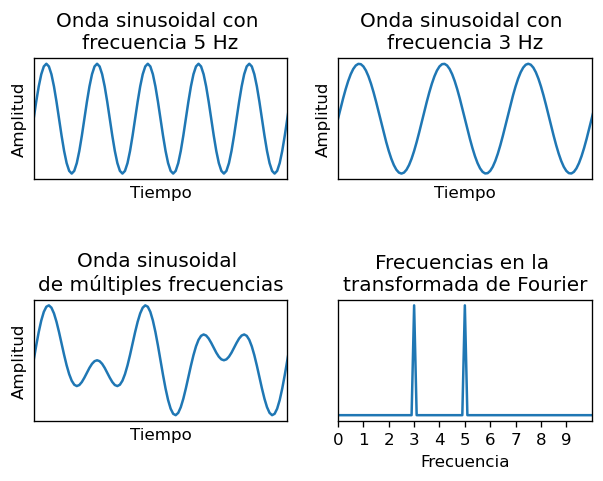

In [37]:
# How many time points are needed i,e., Sampling Frequency
samplingFrequency = 100;

# At what intervals time points are sampled
samplingInterval = 1/samplingFrequency;

# Begin time period of the signals
beginTime = 0;

# End time period of the signals
endTime = 10; 

# Frequency of the signals
signal1Frequency = 5;
signal2Frequency = 3;

# Time points
time = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

# Create subplot
figure, axis = plt.subplots(2, 2, dpi=120)
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1
axis[0,0].set_title('Onda sinusoidal con \nfrecuencia {} Hz'.format(signal1Frequency))
axis[0,0].plot(time, amplitude1)
axis[0,0].set_xlabel('Tiempo')
axis[0,0].set_ylabel('Amplitud')
axis[0,0].set_xticks([])
axis[0,0].set_xlim(0,1)
axis[0,0].set_yticks([])

# Time domain representation for sine wave 2
axis[0,1].set_title('Onda sinusoidal con \nfrecuencia {} Hz'.format(signal2Frequency))
axis[0,1].plot(time, amplitude2)
axis[0,1].set_xlabel('Tiempo')
axis[0,1].set_ylabel('Amplitud')
axis[0,1].set_xticks([])
axis[0,1].set_xlim(0,1)
axis[0,1].set_yticks([])

# Add the sine waves
amplitude = amplitude1 + amplitude2

# Time domain representation of the resultant sine wave
axis[1,0].set_title('Onda sinusoidal \nde múltiples frecuencias')
axis[1,0].plot(time, amplitude)
axis[1,0].set_xlabel('Tiempo')
axis[1,0].set_ylabel('Amplitud')
axis[1,0].set_xticks([])
axis[1,0].set_xlim(0,1)
axis[1,0].set_yticks([])

# Frequency domain representation
# Implementación con np.fft.fft
# fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

#Implementación con scipy.fft.fft
fourierTransform = scipy.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

tpCount = len(amplitude)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
axis[1,1].set_title('Frecuencias en la \ntransformada de Fourier')
axis[1,1].plot(frequencies, abs(fourierTransform))
axis[1,1].set_xlabel('Frecuencia')
# axis[1,1].set_ylabel('Amplitud')
axis[1,1].set_xlim(0,10)
axis[1,1].set_xticks(np.arange(10))
axis[1,1].set_yticks([])

plt.show()

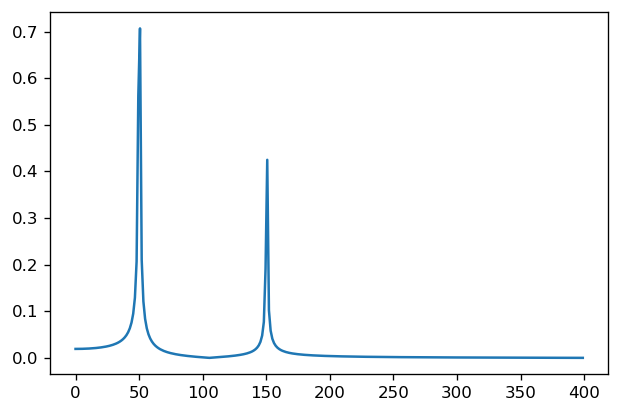

In [38]:
# Número de muestras
N = 600

# Espaciamiento entre muestras
T = 1.0 / 800.0

#
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(150.0 * 2.0*np.pi*x)

yf = scipy.fft.fft(y)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

fig, ax = plt.subplots(dpi=120)
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()